50000
after 0 steps , the loss is 2.470510
Epoch 0 : 1017 / 10000
after 100 steps , the loss is 1.130790
Epoch 100 : 1231 / 10000
after 200 steps , the loss is 0.305570
Epoch 200 : 1531 / 10000
after 300 steps , the loss is 0.649991
Epoch 300 : 1932 / 10000
after 400 steps , the loss is 0.726473
Epoch 400 : 2104 / 10000
after 500 steps , the loss is 0.628048
Epoch 500 : 2420 / 10000
after 600 steps , the loss is 0.173128
Epoch 600 : 2482 / 10000
after 700 steps , the loss is 0.303187
Epoch 700 : 2525 / 10000
after 800 steps , the loss is 0.290097
Epoch 800 : 2703 / 10000
after 900 steps , the loss is 0.208159
Epoch 900 : 2732 / 10000
after 1000 steps , the loss is 0.099786
Epoch 1000 : 2803 / 10000
after 1100 steps , the loss is 0.142387
Epoch 1100 : 3027 / 10000
after 1200 steps , the loss is 0.118408
Epoch 1200 : 3206 / 10000
after 1300 steps , the loss is 0.330322
Epoch 1300 : 3286 / 10000
after 1400 steps , the loss is 0.213439
Epoch 1400 : 3392 / 10000
after 1500 steps , the loss 

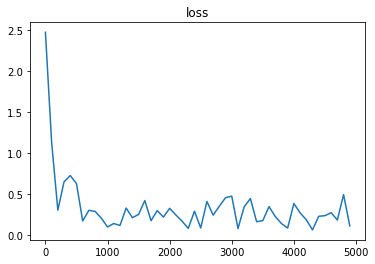

In [12]:
import numpy as np
import pickle
import gzip
import matplotlib.pyplot as plt
 
class node:
    def __init__(self,layer,next_layer=None):
        self.layer = layer
        self.next_layer = next_layer
        self.value = np.zeros((self.layer,1)) #当前节点的值，如X1，y1
        if self.next_layer!=None:
            self.w = np.random.randn(self.next_layer,self.layer) #当前节点到下一节点的权值 randn为标准差为1的正态分布
            self.b = np.random.randn( self.next_layer,1)
            
class data:
    def __init__(self):
        self.inputData = None
 
    def loadData(self,mnist_url):
        f = gzip.open(str(mnist_url), 'rb')
        training_data, validation_data, test_data = pickle.load(f, encoding="latin1")
        f.close()
 
        training_inputs = [np.reshape(x, (784, 1)) for x in training_data[0]]  #（50000，784，1）
        training_results = [self.vectorized_result(y) for y in training_data[1]] #（50000，10，1)
        training_data = zip(training_inputs, training_results)
 
        # validation_inputs = [np.reshape(x, (784, 1)) for x in validation_data[0]]
        # validation_data = zip(validation_inputs, validation_data[1])
        #
        test_inputs = [np.reshape(x, (784, 1)) for x in test_data[0]]
        test_data = zip(test_inputs, test_data[1])
        return (training_inputs,training_results,test_data)
 
 
    def vectorized_result(self,j):
        e = np.zeros((10, 1))
        e[j] = 1.0
        return e
 
    def getInput(self):
        return self.inputData
    
class net:
    def __init__(self):
        self.inputLayer = node(784,30)
        self.hindLayer = node(30,10)
        self.outputLayer = node(10)
        self.learningRate = 0.01
        self.y_real = None
        self.loss = []
        self.step = []
 
    def sigmoid(self,z):
        return  1.0/(1.0 + np.exp(-z))
 
    def softmax(self,y):
        sum = 0
        lenth = len(y)
        for i in range(lenth):
            #print(lenth,sum)
            sum += np.exp(y[i])
 
        for i in range(lenth):
            y [i] = np.exp(y[i])/sum
        return  y
 
    def feedforward(self, a):
        #计算隐藏层节点值
        z1 = np.dot(self.inputLayer.w,a)+self.inputLayer.b
        y1 = self.sigmoid(z1)
 
        # 计算输出层节点值
        z2 = np.dot(self.hindLayer.w, y1) + self.hindLayer.b
        y2 = self.sigmoid(z2)
 
        return y2
 
    def evaluate(self, test_data):
        test_results = [(np.argmax(self.feedforward(x)), y)
                                for (x, y) in test_data]
 
        return sum(int(x == y) for (x, y) in test_results)
 
    def train(self, training_inputs,training_results, epochs,test_data):
        #for (x,y) in training_data:
 
        training_inputs = list(training_inputs)
        training_results = list(training_results)
        self.y_real = training_results
        # 将训练数据集强转为list
        n = len(training_inputs)  #n=50000
        print(n)
 
        for j in range(epochs):
            self.forwardPropagation(training_inputs[j])
 
            self.backwardPropagation(training_results[j])
                # 调用梯度下降算法
            if j%100 ==0:
                self.printResult(j)
                if test_data:
                # 如果有测试数据集
                    test_data = list(test_data)
                    # 将测试数据集强转为list
                    n_test = len(test_data)
                    print("Epoch {} : {} / {}".format(j, self.evaluate(test_data), n_test));
                # j为迭代期序号
                # evaluate(test_data)为测试通过的数据个数
                # n_test为测试数据集的大小
                else:
                    print("Epoch {} complete".format(j))
        self.plot_loss()         
                    
                    
    def forwardPropagation(self,inputData):
        self.inputLayer.value = inputData
 
        #计算隐藏层节点值
        z1 = np.dot(self.inputLayer.w,self.inputLayer.value)+self.inputLayer.b
        y1 = self.sigmoid(z1)
        self.hindLayer.value = y1
 
        # 计算输出层节点值
        z2 = np.dot(self.hindLayer.w, self.hindLayer.value) + self.hindLayer.b
        y2 = self.sigmoid(z2)
        self.outputLayer.value = y2
 
 
    def backwardPropagation(self,y2_real):
        #self.target = y2_real
        x1 = np.mat(self.inputLayer.value)
        y1 = np.mat(self.hindLayer.value)
        y2 = np.mat(self.outputLayer.value)
        w2 = np.mat(self.hindLayer.w)
        w1 = np.mat(self.inputLayer.w)
        b1 = np.mat(self.inputLayer.b)
        b2 = np.mat(self.hindLayer.b)
        self.y_real = np.mat(y2_real)
 
        #更新隐藏层权重值
        partial_1 = y2_real/y2-(1-y2_real)/(1-y2)
        partial_2 = np.multiply(y2,(1-y2))
        partial_3 = y1.transpose()
        delta_b2 =  - np.multiply(partial_1,partial_2)
        delta_w2 =  np.dot(delta_b2,partial_3)
        w2 -= self.learningRate * delta_w2
        b2 -= self.learningRate * delta_b2
 
        # 更新输入权重值
        partial_1 =[]
        for i in range(self.inputLayer.next_layer):
            z = y2_real/y2-(1-y2_real)/(1-y2)
            #z = np.multiply(y2_real-y2,y2)
            z = np.multiply(z, y2)
            z = np.multiply(z, 1-y2)
            z = np.multiply(z, w2[:,i])
            partial_1 = np.append(partial_1,np.sum(z))
 
        partial_1 = partial_1.reshape((30,1))
        partial_2 = np.multiply(partial_1,y1)
        partial_3 = x1.transpose()
        delta_b1 = -np.multiply(partial_2,1-y1)
        delta_w1 = np.dot(delta_b1,partial_3)
        b1 -= self.learningRate * delta_b1
        w1 -= self.learningRate * delta_w1
        # for layer in range(self.inputLayer.layer) :
        #     for next_layer in range(self.inputLayer.next_layer):
        #         for out_node in range(self.hindLayer.next_layer):
        #             w1[next_layer][layer] -=  self.learningRate *(-((y2_real[out_node]*(1-y2[out_node])
        #                                       +y2[out_node]*(1-y2_real[out_node]))*w2[out_node][next_layer]
        #                                         *y1[next_layer]*(1-y1[next_layer])*x1[layer]))
 
 
    def getloss(self,steps):
        if self.y_real.all() == None:
            return
 
        # 交叉熵损失函数
 
        y2 = self.outputLayer.value
        loss1 = np.multiply(self.y_real,np.log(y2))
        loss2 = np.multiply(1-self.y_real,np.log(1-y2))
        loss = -sum((loss1+loss2))
        loss = np.nan_to_num(loss)/10
        # for i in range(self.outputLayer.layer):
        #     loss += -((int(self.y_real[steps][i])*np.log(float(self.outputLayer.value[i])))
        #               + ((1-int(self.y_real[steps][i]))*np.log(1-float(self.outputLayer.value[i]))))
        self.loss.append(loss)
        return  loss
 
 
    def printResult(self,steps):
#         self.loss.append(self.getloss(steps))
        self.step.append(steps)
        print("after %d steps , the loss is %f" % (steps,self.getloss(steps)))
    
    def plot_loss(self):
        plt.plot(self.step,np.squeeze(self.loss))
        plt.title('loss')
        plt.savefig('loss.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题
        
        
 

def main():
    m_net = net()
    m_data = data()
    training_inputs, training_results ,test_data= m_data.loadData('mnist.pkl.gz')
    m_net.train(training_inputs,training_results, 5000,test_data)
 
 
if __name__ == '__main__':
    main()